In [4]:
real_sample = lambda n_batch: np.random.normal(4, 1.25, (n_batch, 100))

In [5]:
real_sample(1)

array([[3.03176604, 4.38481172, 3.89092615, 2.38223501, 4.84147091,
        5.54978007, 0.69236158, 3.72297457, 4.83506179, 6.3812466 ,
        4.99425978, 4.21388802, 3.75130963, 4.88945395, 3.43776848,
        3.70038717, 2.98278286, 4.61924152, 3.73936661, 4.50842032,
        4.26222458, 6.01363192, 3.79830779, 5.06986036, 3.29429154,
        4.78842465, 5.91559671, 3.34232823, 3.0317103 , 2.21423516,
        2.58322523, 4.31357318, 4.26452176, 4.16518086, 4.73195176,
        3.61605351, 3.14664103, 6.35642164, 5.73860371, 4.21398384,
        1.2282522 , 3.64658645, 2.72719993, 5.29714702, 3.16408339,
        3.26758316, 4.59721416, 1.99388293, 5.18377593, 4.22602484,
        4.01549768, 5.42989781, 3.5983266 , 3.5213028 , 1.85560193,
        5.81121125, 6.47729239, 2.84211022, 3.7788841 , 2.28966035,
        6.14659495, 2.9581311 , 3.87290564, 4.34832173, 6.09085647,
        1.42356613, 4.1874819 , 4.12886261, 4.19609768, 2.25220495,
        5.7930263 , 4.49100526, 4.52309225, 6.09

In [64]:
import os
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import optimizers


def add_decorate(x):
    """
    axis = -1 --> last dimension in an array
    """
    m = K.mean(x, axis=-1, keepdims=True)
    d = K.square(x - m)
    return K.concatenate([x, d], axis=-1)


learning_rate = 0.001

model = Sequential()
# model.add(Lambda(add_decorate, output_shape=None, input_shape=(100,)))
model.add(Dense(50, activation='relu', input_shape=(100,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.RMSprop(lr=learning_rate, rho=0.9, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

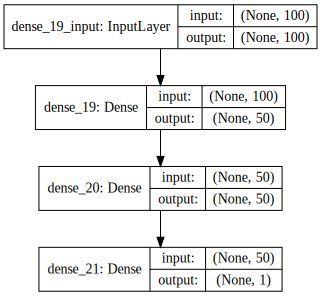

In [65]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
G = Sequential()
G = models.Sequential()  # (Batch, ni_D)
G.add(Reshape((100, 1), input_shape=(100,)))  # (Batch, steps=ni_D, input_dim=1)
G.add(Conv1D(50, 1, activation='relu'))  # (Batch, ni_D, nh_G)
G.add(Conv1D(50, 1, activation='sigmoid'))  # (Batch, ni_D, nh_G)
G.add(Conv1D(1, 1))  # (Batch, ni_D, 1)
G.add(Flatten())  # (Batch, ni_D)
optimizer = optimizers.RMSprop(lr=learning_rate, rho=0.9, epsilon=None, decay=0.0)
G.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

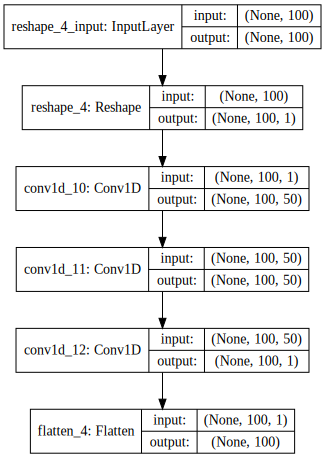

In [13]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(G, show_shapes=True).create(prog='dot', format='svg'))

## keras Backend K 함수의 사용법

In [42]:
b = K.random_uniform_variable(shape=(3, 4), low=0, high=1) # Uniform distribution
c = K.random_normal_variable(shape=(3, 4), mean=0, scale=1) # Gaussian distribution

# Tensor Arithmetic
a = K.concatenate([b, c], axis=-1)

In [43]:
b

<tf.Variable 'Variable_6:0' shape=(3, 4) dtype=float32_ref>

In [44]:
c

<tf.Variable 'Variable_7:0' shape=(3, 4) dtype=float32_ref>

In [45]:
a

<tf.Tensor 'concat_2:0' shape=(3, 8) dtype=float32>

#### np shape과의 비교를 통한 이해

In [35]:
y = np.zeros((3,4))
print(y)
print(y.shape)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [60]:
y = np.zeros((3,4))
x = np.zeros((3,3))
# y = np.zeros((3,4,2)) --> 이것도 됨
# x = np.zeros((3,4,5))

In [61]:
z = np.concatenate((y, x), axis=-1)

In [50]:
print(z)
print(z.shape)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
(3, 7)


In [63]:
y = np.zeros((4,3))
x = np.zeros((3,3))
# axis 0의 의미는 shape의 index의 의미. iterate하는 index 빼고는 모두 동일해야 함.
# y = np.zeros((4,3,1)) --> 됨
# x = np.zeros((3,3,1))
# y = np.zeros((4,3,1)) --> 안됨
# x = np.zeros((3,3,0))
z2 = np.concatenate((y, x), axis=0) 
print(z2)
print(z2.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(7, 3)


In [1]:
real_sample = lambda n_batch: np.random.normal(4, 1.25, (n_batch, 100))
in_sample = lambda n_batch: np.random.rand(n_batch, 100)

In [17]:
real = real_sample(3)
gen = real_sample(3)

In [18]:
y = np.array([1] * real.shape[0] + [0] * gen.shape[0])

In [19]:
[1] + [0]

[1, 0]

In [20]:
y

array([1, 1, 1, 0, 0, 0])

In [21]:
real.shape[0]

3

In [22]:
[1] * real.shape[0]

[1, 1, 1]

In [23]:
x = np.concatenate([real, gen], axis=0)

In [24]:
x

array([[ 2.97918978,  5.10132657,  3.65543821,  2.78849216, -0.04715459,
         5.08405716,  5.68713309,  2.14667792,  7.0236518 ,  3.00598861,
         3.35689363,  5.70298656,  3.51495063,  3.57992943,  6.18464129,
         4.89258323,  2.55266557,  4.34382059,  5.26964885,  3.39476211,
         4.77809773,  3.30944916,  3.45915683,  6.6149073 ,  2.4509732 ,
         5.47808189,  3.27929088,  3.87603207,  2.8433923 ,  3.67031816,
         2.91141361,  4.0972883 ,  4.63298574,  5.24611983,  4.65460471,
         5.51841572,  3.73893233,  4.52519879,  2.89487291,  4.17097219,
         5.04318346,  4.76153152,  1.56733539,  6.2997388 ,  5.15840255,
         4.4605328 ,  4.56299552,  2.50908287,  5.87134143,  3.20765009,
         5.04428035,  5.30521665,  4.00614292,  2.35264236,  1.55235888,
         1.5112701 ,  3.14882111,  4.23690255,  4.49969477,  3.79827856,
         1.31074701,  4.22863821,  2.99164785,  5.27678018,  3.68513172,
         3.04250725,  3.01852772,  2.68228195,  3.5